## First Models

In this notebook all I really want to do is see if all the custom functions written before work and transform the dataset seamlessly or not. Then try out a few basic classification models and see if they work at all for ternary classification.

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
#import customized functions
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import exploration_functions as efs
from src.data_cleaning import processing_functions as pfs
from src.data_cleaning import useful_viz 

In [13]:
X_train, X_test, y_train, y_test, classes_dict = pfs.processed_dataset()

In [14]:
X_train, encoders = pfs.ohe_all_categorical_features(X_train)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression(random_state= 2020, max_iter=1000)
fsm = lr.fit(X_train, y_train)

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Need to fix these but moving along for now....

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [18]:
confusion_matrix(y_train, fsm.predict(X_train))

array([[21174,     1,  3074],
       [ 2440,     0,   725],
       [ 6976,     0, 10160]], dtype=int64)

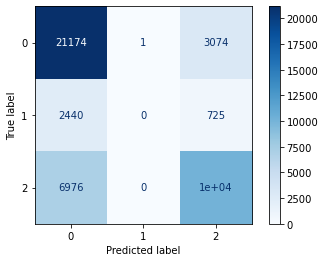

In [19]:
plot_confusion_matrix(fsm, X_train, y_train, cmap='Blues');

**Yikes that doesn't work at all**

#### DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3,random_state=2020)
fsm2 = dt.fit(X_train, y_train)
confusion_matrix(y_train, fsm2.predict(X_train))

array([[21907,     0,  2342],
       [ 2479,     0,   686],
       [ 7910,     0,  9226]], dtype=int64)

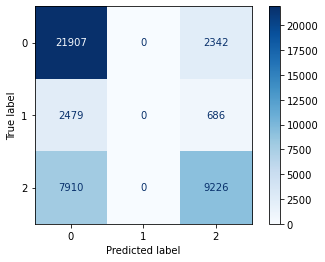

In [21]:
plot_confusion_matrix(fsm2, X_train, y_train, cmap='Blues');

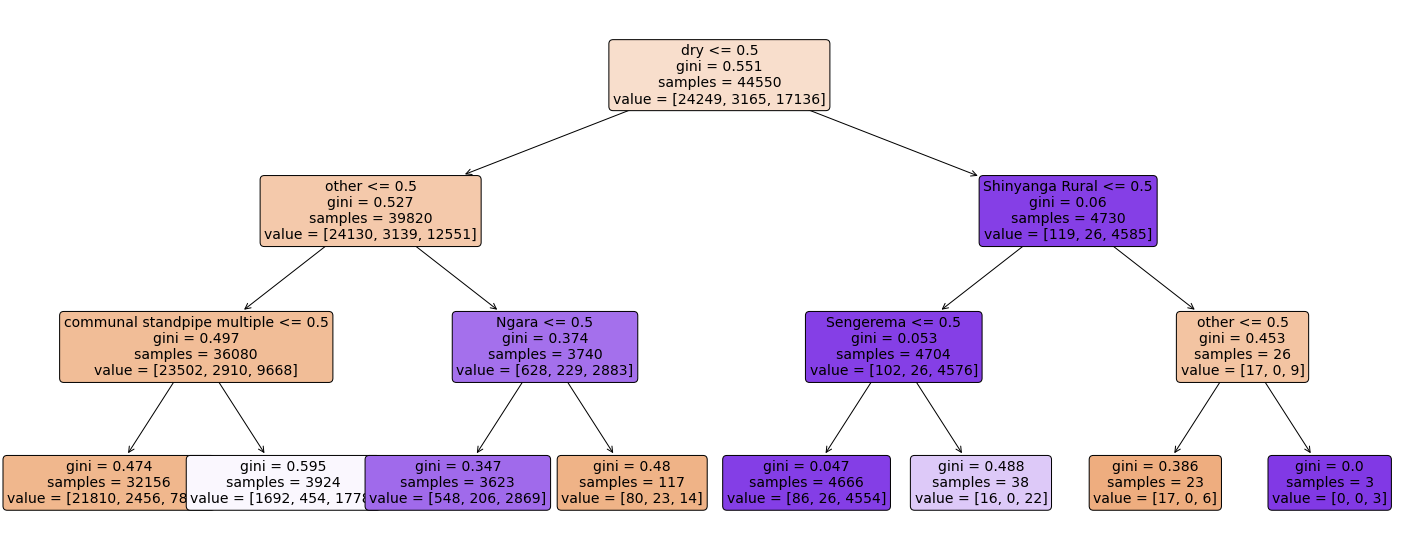

In [22]:
plt.figure(figsize=(25,10))
p=plot_tree(dt,feature_names=X_train.columns,filled=True,rounded=True, fontsize=14)

testing function

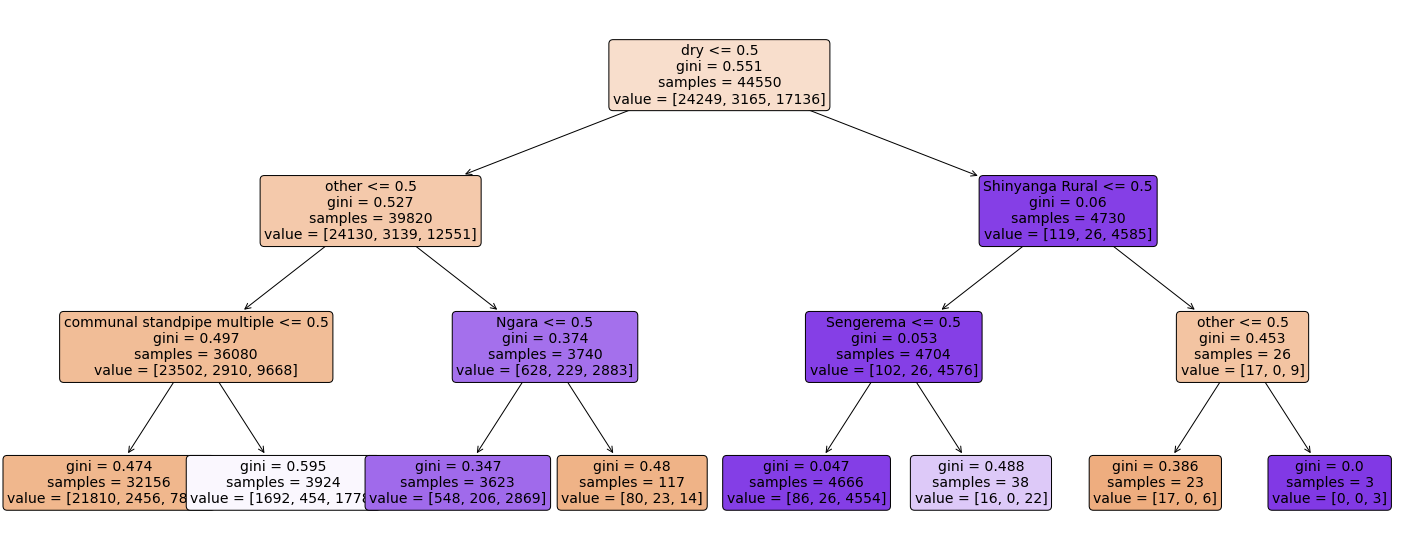

In [24]:
useful_viz.show_tree(dt,X_train);

#### Much better, long way to go still

### Next Steps:
* Read up ensemble methods
* Class imbalance - figure out how to fix that